In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [2]:
train = pd.read_csv(r"D:\Study\DVA\project\2016_properties_60000v3_train.csv").dropna()
test = pd.read_csv(r"D:\Study\DVA\project\2016_properties_60000v3_test.csv").dropna()

train_y = np.log(train.iloc[:,7])
test_y = np.log(test.iloc[:,7])

train_y = train.iloc[:,7]
test_y = test.iloc[:,7]

train['train']=1
test['train']=0
alldata=pd.concat([train, test], axis=0)
totaly=np.log(alldata.iloc[:,7])
temp=np.where(alldata.iloc[:,7]>np.percentile(alldata.iloc[:,7], 97.5),np.percentile(alldata.iloc[:,7], 95),alldata.iloc[:,7])


D:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


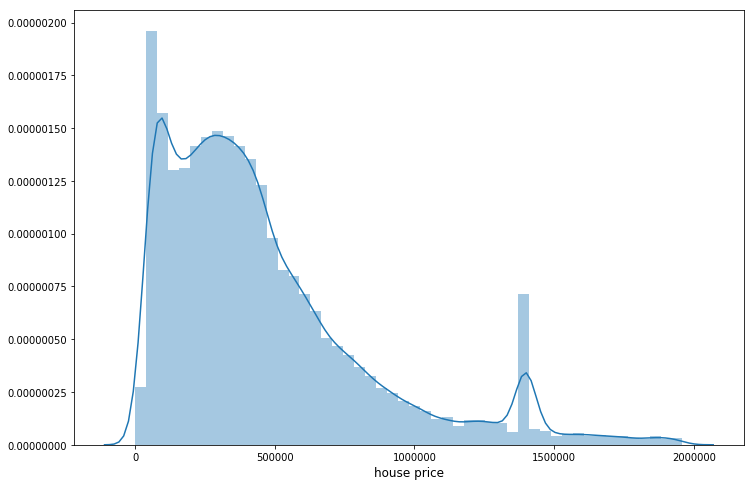

In [3]:
plt.figure(figsize=(12,8))
sns.distplot(temp , bins=50, kde=True)
plt.xlabel('house price', fontsize=12)
plt.show()


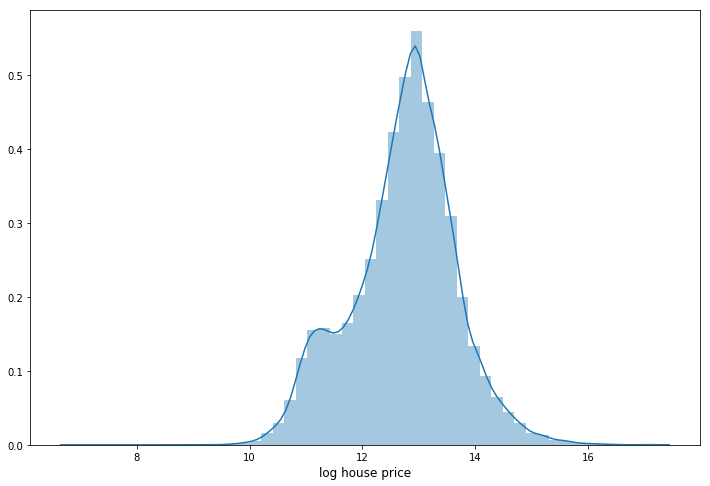

In [4]:
plt.figure(figsize=(12,8))
sns.distplot(totaly, bins=50, kde=True)
plt.xlabel('log house price', fontsize=12)
plt.show()


In [5]:
alldata = alldata.drop(["parcelid","taxvaluedollarcnt"],axis=1)

alldata['yearbuilt']=(round(alldata['yearbuilt']/10,0)*10).astype(int)
cat_list=["bathroomcnt", "bedroomcnt", 'yearbuilt', "roomcnt"]
other_list=[var for var in alldata.columns.tolist() if var not in cat_list+['train']]

alldata["bathroomcnt"]=(round(alldata["bathroomcnt"].astype(np.double),0)).astype(int)
alldata["bathroomcnt"]=np.where(alldata["bathroomcnt"]>=6,6,alldata["bathroomcnt"])
alldata["bedroomcnt"]=np.where(alldata["bedroomcnt"]>=6,6,alldata["bedroomcnt"])
alldata["roomcnt"]=np.where(alldata["roomcnt"]>=10,10,alldata["roomcnt"])
alldata[cat_list]=alldata[cat_list].astype(object)


In [7]:
dummies=pd.get_dummies(alldata[cat_list])
dummies_list=[var for var in alldata.columns.tolist() if var not in ['bathroomcnt_0','bedroomcnt_0','yearbuilt_1880','roomcnt_0']]
long_list=dummies_list+other_list
short_list=dummies_list+['calculatedfinishedsquarefeet','lotsizesquarefeet','heating1','heating2','heating3','quality1','quality2','quality3','quality4']

trainx=pd.concat([alldata, dummies],axis=1)

In [15]:
alldatay=pd.concat([alldata,pd.concat([train, test], axis=0)["taxvaluedollarcnt"]],axis=1)
alldatay['logprice']=np.log(alldatay["taxvaluedollarcnt"])

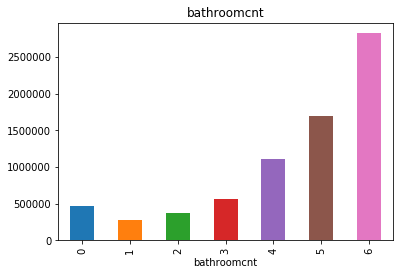

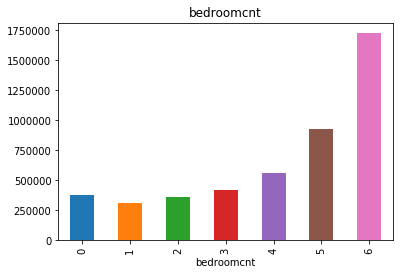

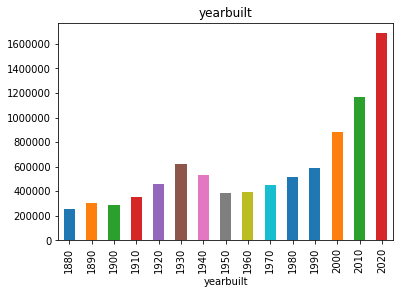

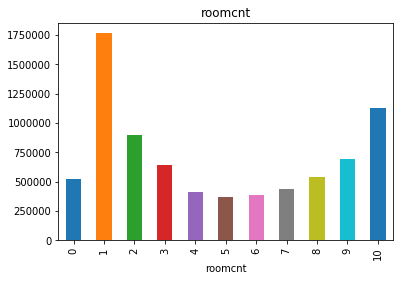

In [18]:
def bi_cat_analysis(data,xvar_list, yvar):
    for xvar in xvar_list:
        temp=data.groupby(xvar)[yvar].mean()
        plt.figure()
        temp.plot.bar()
        plt.title(xvar)
        plt.show()
bi_cat_analysis(alldatay,cat_list,"taxvaluedollarcnt")

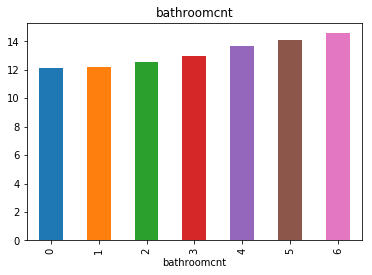

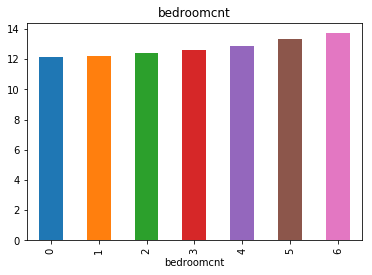

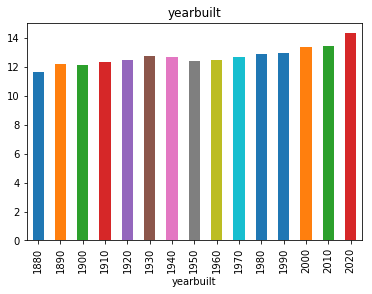

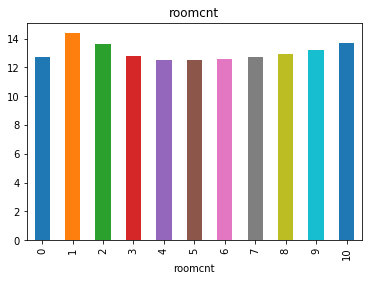

In [19]:

bi_cat_analysis(alldatay,cat_list,'logprice')

In [22]:
num_list=[var for var in other_list if var not in ['heating1', 'heating2', 'heating3', 'quality1', 'quality2', 'quality3', 'quality4']]

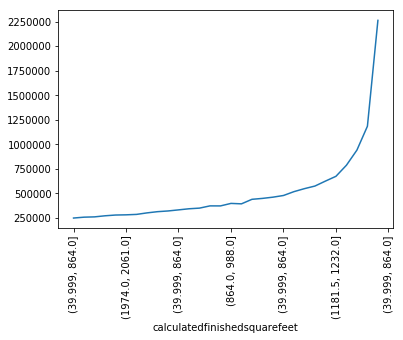

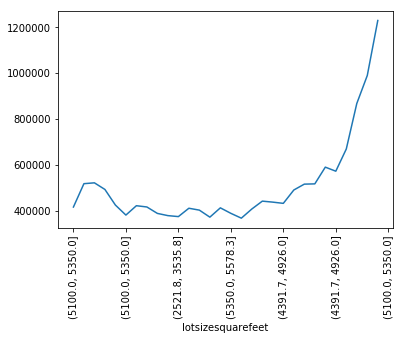

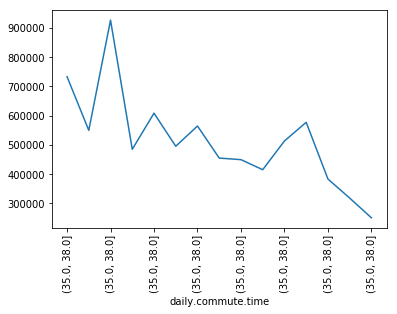

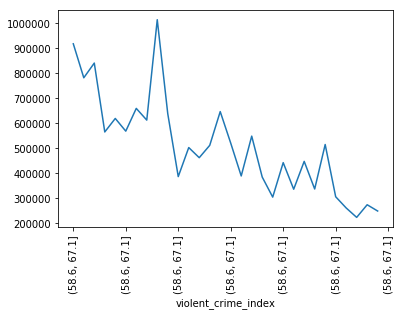

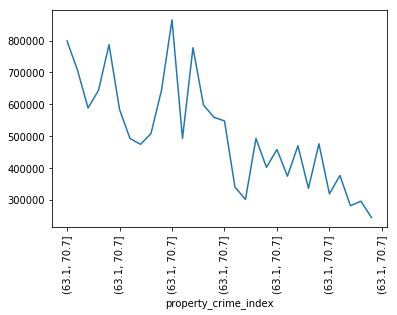

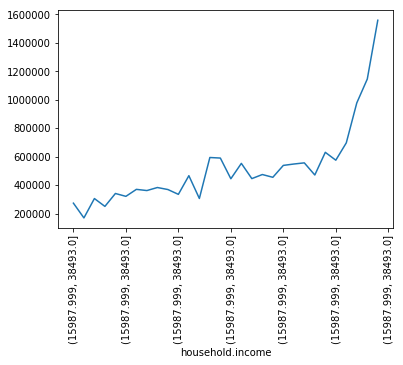

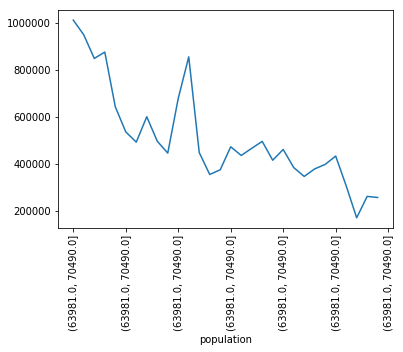

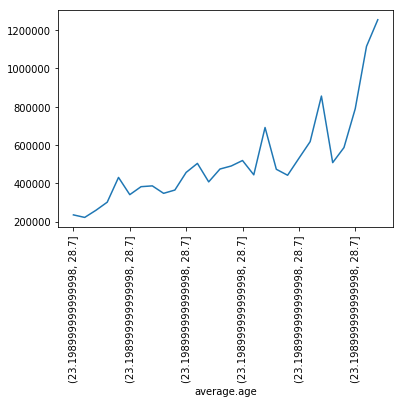

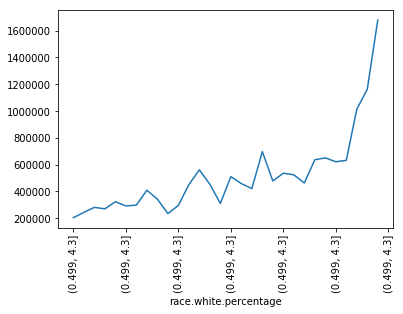

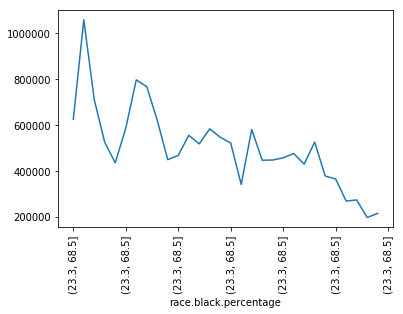

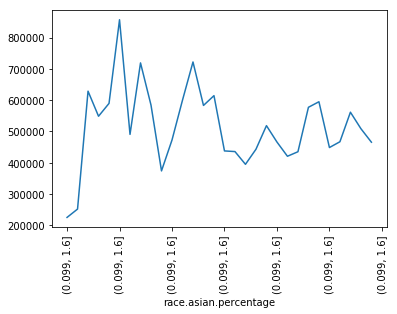

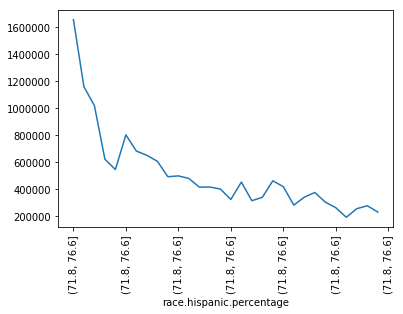

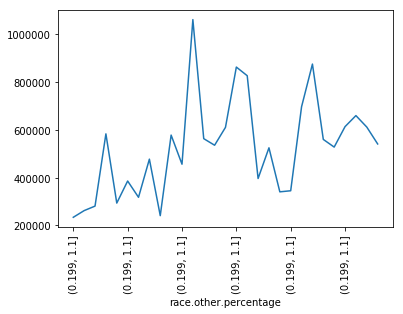

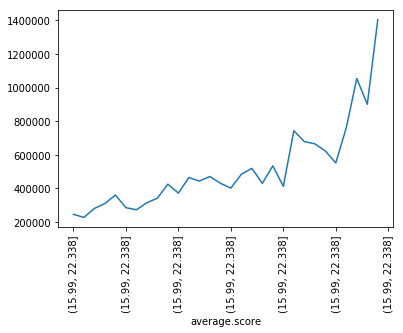

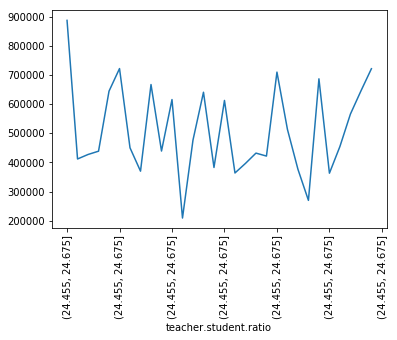

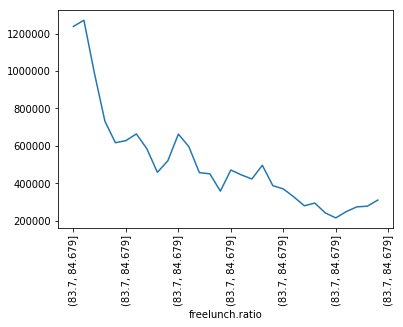

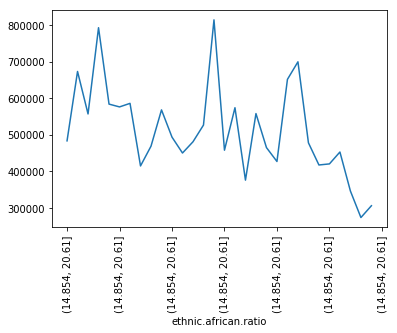

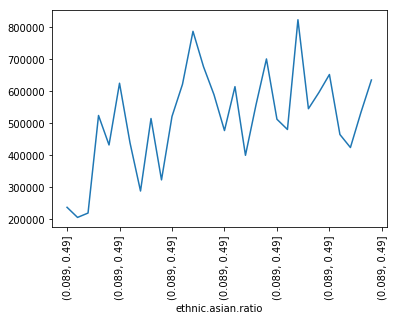

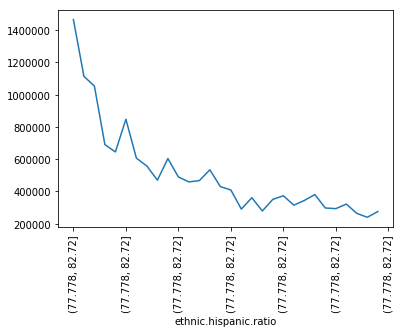

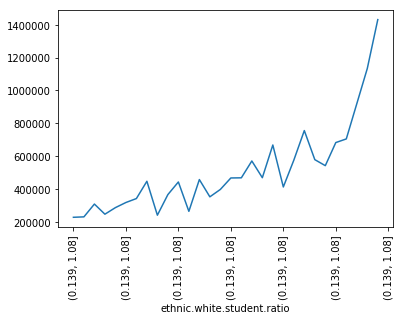

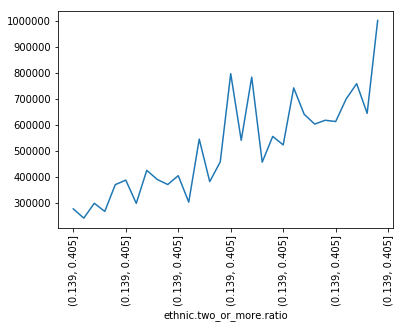

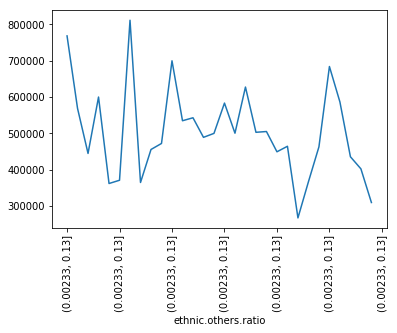

In [23]:

def bi_num_analysis(data,xvar_list, yvar):
    for xvar in xvar_list:
        temp_data=data[data[xvar]>0]
        group=pd.qcut(temp_data[xvar],30,duplicates='drop' )
        temp=temp_data.groupby(group)[yvar].mean()
        fig, ax = plt.subplots()
        fig=temp.plot()
        ax.set_xticklabels(group, rotation=90)
        plt.show()
bi_num_analysis(alldatay,num_list,"taxvaluedollarcnt")

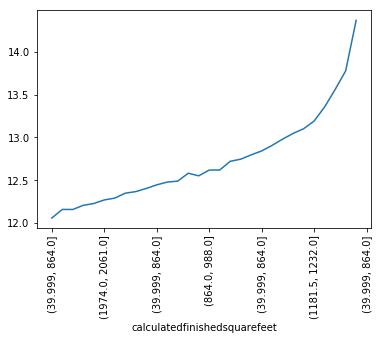

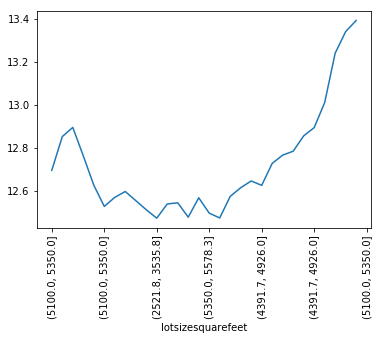

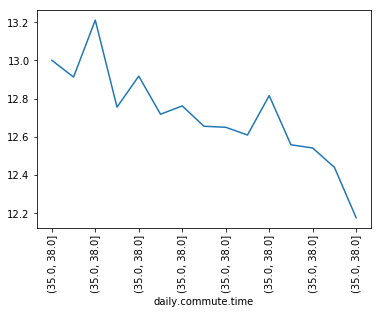

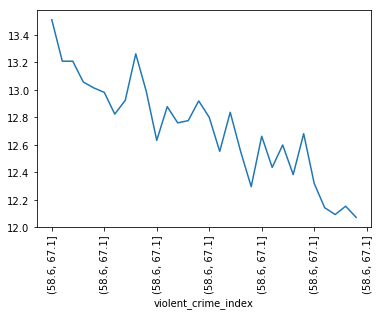

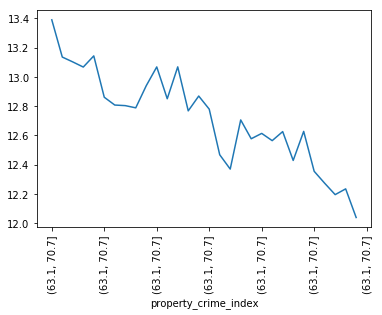

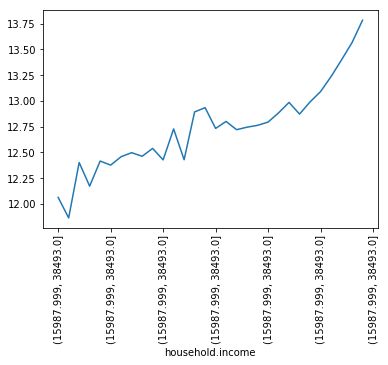

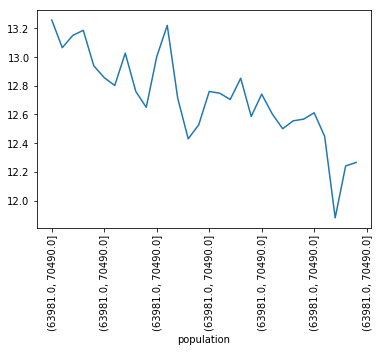

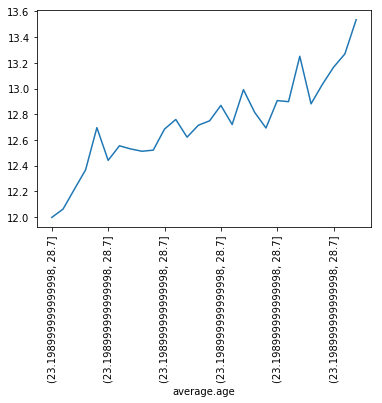

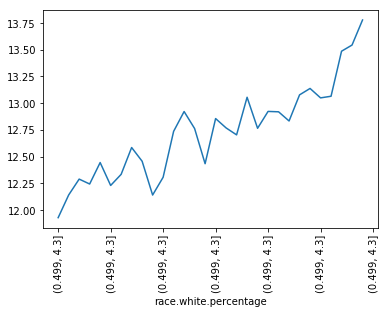

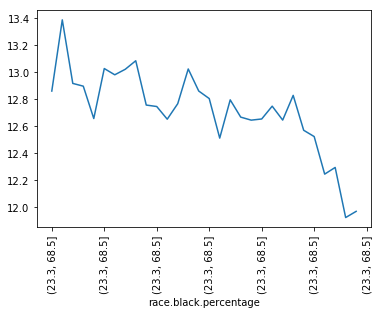

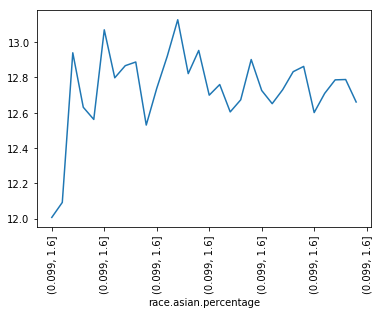

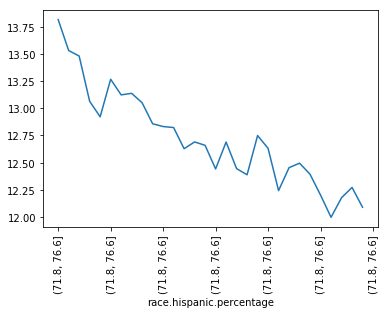

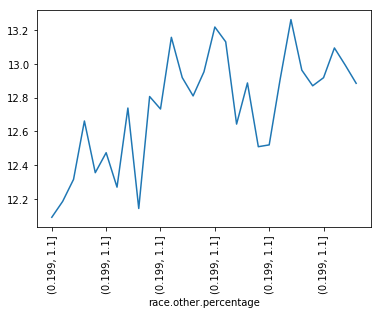

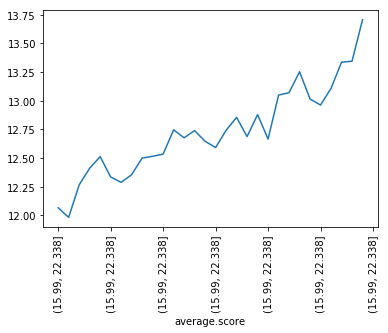

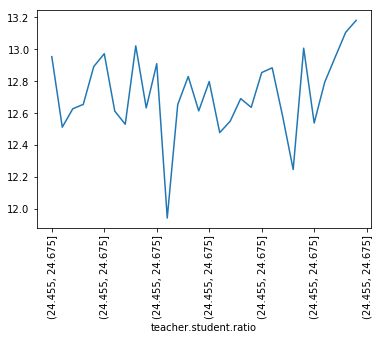

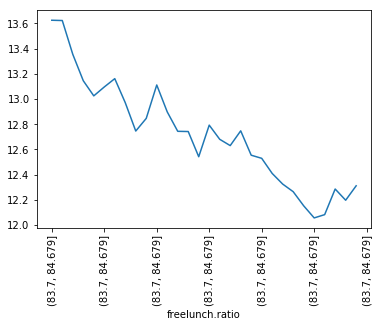

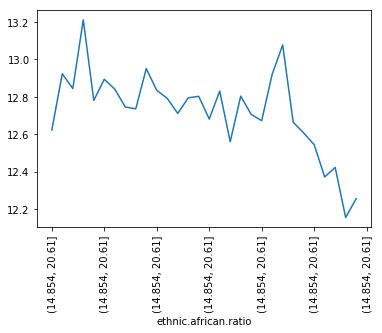

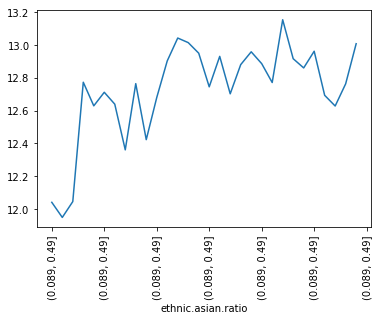

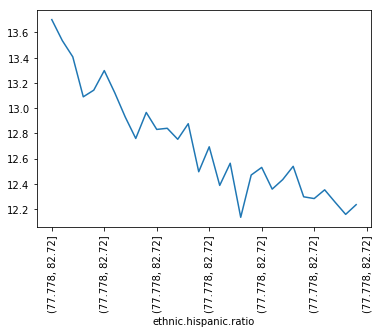

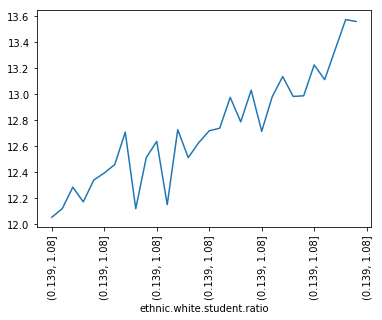

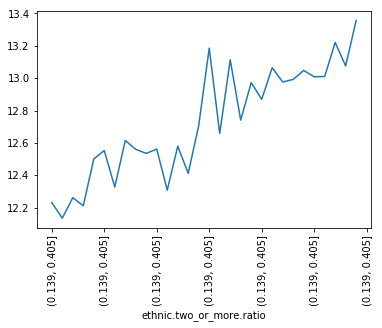

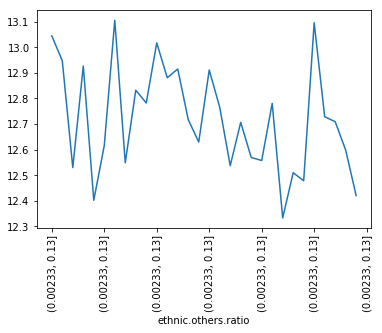

In [24]:
bi_num_analysis(alldatay,num_list,"logprice")

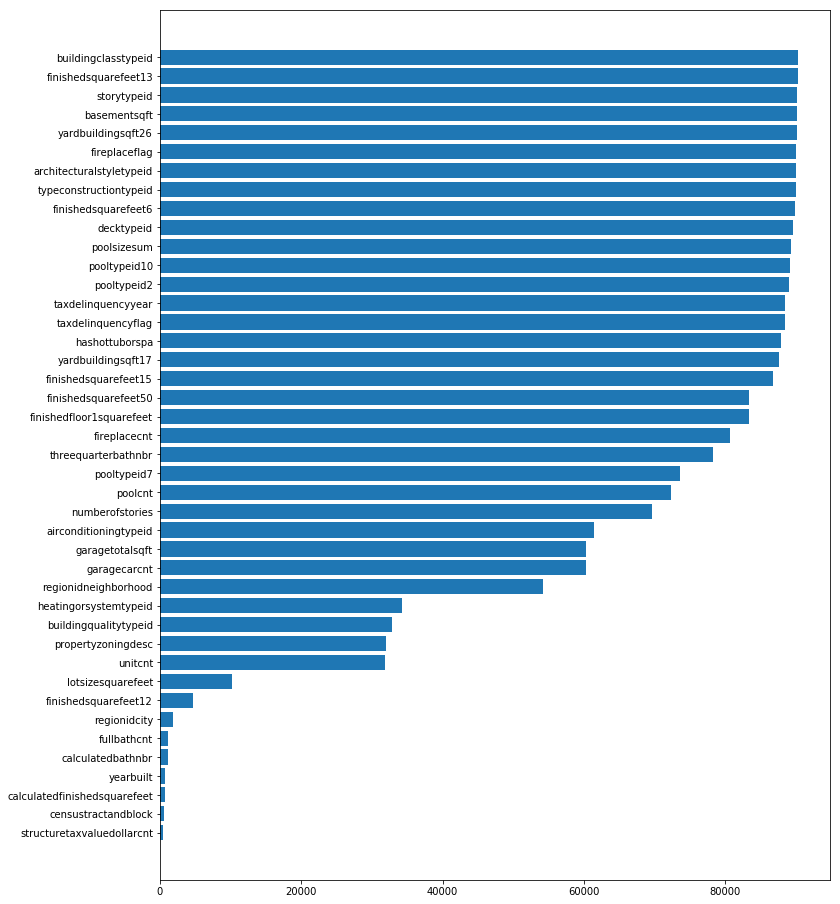

In [9]:
missing_df=all2016.isnull().sum().sort_values(ascending=True)[20:]
fig, ax=plt.subplots(figsize=(12,16))
plt.barh(missing_df.index, missing_df.values)
plt.show()